# Coding lecture 4

## Review

- MNIST dataset
- `iter()`, `next()`
- Matrix-vector multiplications and "broadcastability".
- `loss.backward()` vs hand computation.
- Using `with torch.no_grad():` is necessary in manual gradient descent computation.
- Gradient descent explicit implementation.

## In this lecture
- Generator, iterator, `enumerate()`.
- `class` and object-oriented programming. `constructor`, inheritance, the usage of `super`.
- Build simple neural network using `nn.Module` class.
- `try: except:` flow control.
- PyTorch training pipeline template.
- Torch `DataLoader` interface for (mini-batch) GD.
- A new variable type: dictionary `dict`.

In [13]:
import torch

### Generator and iterator

In [14]:
# give several examples of iter and next
# Iterator

for i in range(5):
  print(i)

0
1
2
3
4


In [15]:
lst1 = ['apple', 'pear', 'kiwi'] # iterable

for i in range(len(lst1)):
  print(lst1[i])

apple
pear
kiwi


In [16]:
print(lst1)
# all the items of this list is loaded into the memory
print(type(lst1), '\n')

for u in lst1:
  print(u)

['apple', 'pear', 'kiwi']
<class 'list'> 

apple
pear
kiwi


In [17]:
# Iterator
lst2 = iter(lst1)
print(type(lst2))
print(lst2) # an Iterator is a Generator
# it does NOT load all the items to the memory

<class 'list_iterator'>


In [18]:
f = next(lst2)
print(f)

apple


In [19]:
for v in lst2:
  # for an iterator,
  # the item is loaded into memory one at a time
  print(v)

pear
kiwi


### Object-oriented programming

In [20]:
def func(x, y):
    x = x+y
    return x**2

print(func(3.14, 1))

17.139600000000005


In [21]:
class CS:
  name = 'CS5590'
  alt_name = 'Math5555'
  time = '8:30'
  import time

In [22]:
c = CS
print(type(c))

<class 'type'>


In [23]:
c.name # how to access to attributes

'CS5590'

In [24]:
class Vector:
  # or
  # class Vector(object):
  # __function__: Python tradition of built-in
  # function name
  # __init__ function is a constructor
  def __init__(self, # self refers to the class itself
               x_coords, # custom input to initialize a class
               y_coords,
               ):
    self.x = x_coords # attribute x
    self.y = y_coords # attribute y

  def add(self, vec): # a method in this class
    sum_vec = [self.x, self.y]
    sum_vec[0] = self.x + vec.x
    sum_vec[1] = self.y + vec.y
    return sum_vec


In [25]:
v = Vector()

TypeError: ignored

In [26]:
v = Vector(1.5, 6) # __init__ function has been run
print(v.x, v.y)

1.5 6


In [27]:
u = Vector(2, 1)
print(u.x, u.y)

2 1


In [28]:
u + v # operand + is not defined for Vector

TypeError: ignored

In [29]:
u.add(v)

[3.5, 7]

In [30]:
v.add(u)

[3.5, 7]

In [31]:
# + is defined by user
# different for different obj
lst1 = [1, 2]
lst2 = [53, 100]
print(lst1 + lst2)

arr1 = torch.Tensor(lst1)
arr2 = torch.tensor(lst2)
print(arr1 + arr2)

[1, 2, 53, 100]
tensor([ 54., 102.])


In [32]:
class VectorNew:
  def __init__(self, # self refers to the class itself
               x_coords, # custom input to initialize a class
               y_coords,
               ):
    self.x = x_coords # attribute x
    self.y = y_coords # attribute y

  def __add__(self, vec):
    # define + behavior for this class
    return [self.x+vec.x, self.y+vec.y]

In [33]:
u = VectorNew(1.5, 2)
v = VectorNew(3, 5)
print(u + v)

[4.5, 7]


In [34]:
print(u)

In [35]:
class VectorNewNew:
  def __init__(self, # self refers to the class itself
               x_coords, # custom input to initialize a class
               y_coords,
               ):
    self.x = x_coords # attribute x
    self.y = y_coords # attribute y

  def __add__(self, vec):
    # define + behavior for this class
    return [self.x+vec.x, self.y+vec.y]

  def __repr__(self):
     return f"<{self.x}, {self.y}>"

In [36]:
u = VectorNewNew(1.5, 2)
print(u)

<1.5, 2>


# A complete pipeline

- Data preparation
- Train-Validation (Train-Test) split (for our final project, will be covered later)
- Model
- Choose an optimizer or write one on our own.
- Choose an scheduler or write one on our own (optional, will be covered later).
- Choose the proper loss function.
- Train! (and validate at the same time)
- Inference (for our final project, will be covered later).

In [52]:
import torch
import torch.nn as nn
import numpy as np

from torchvision import datasets, transforms
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from tqdm.auto import tqdm

In [38]:
train = datasets.MNIST(root='./',
                       train=True,
                       download=True,
                       transform = transforms.ToTensor());

100%|██████████| 9912422/9912422 [00:00<00:00, 145760011.94it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 64640178.13it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 32737947.44it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 11701799.00it/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [39]:
print(train, '\n')
print(type(train))

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./
    Split: Train
    StandardTransform
Transform: ToTensor() 

<class 'torchvision.datasets.mnist.MNIST'>


In [40]:
dir(train)

['__add__',
 '__annotations__',
 '__class__',
 '__class_getitem__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_exists',
 '_check_legacy_exist',
 '_format_transform_repr',
 '_is_protocol',
 '_load_data',
 '_load_legacy_data',
 '_repr_indent',
 'class_to_idx',
 'classes',
 'data',
 'download',
 'extra_repr',
 'mirrors',
 'processed_folder',
 'raw_folder',
 'resources',
 'root',
 'target_transform',
 'targets',
 'test_data',
 'test_file',
 'test_labels',
 'train',
 'train_data',
 'train_labels',
 'training_file',
 'transform',
 'transforms']

In [41]:
train_loader = DataLoader(train, batch_size=64)

In [42]:
print(type(train_loader))

<class 'torch.utils.data.dataloader.DataLoader'>


In [43]:
sample = next(iter(train_loader))
# sample is a list [X, y]
# X: data
# y: label

In [46]:
print(type(sample))

<class 'list'>


In [44]:
print(sample[0].size())
#
# (n_batch, n_channel, height, width)
# N_C in PyTorch official docs
# how many color channels we have, 3 means RGB

torch.Size([64, 1, 28, 28])


In [45]:
print(sample[1].size())

torch.Size([64])


In [ ]:
print(sample[1][:10])

tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4])


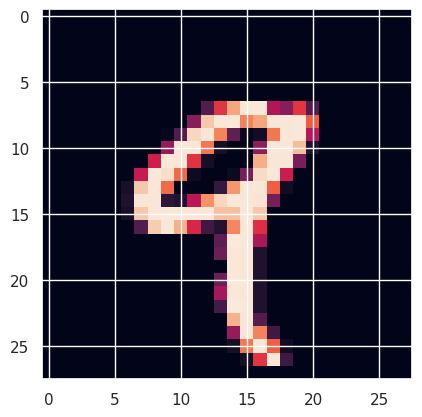

In [54]:
plt.imshow(sample[0][4].squeeze())
# sample[0] gives the tensor of a batch of images
# sample[0][0] returns the first image

In [56]:
class MLP(nn.Module):
    # subclass of nn.Module
    # inheriting every method of nn.Module
    # after calling the super() function
    def __init__(self, input_size):
        '''
        __init__: initialize
        the first variable has to be self
        afterward, constructors
        '''
        super().__init__()
        self.linear0 = nn.Linear(input_size, 256)
        # nn.Linear(input_dim, output_dim)
        self.activation = nn.ReLU()
        self.linear1 = nn.Linear(256, 10)
        # this function does not have any return value

    def forward(self, x):
      # forward is a "fixed" method from nn.Module
      # this is different from @staticmethod
      # the behavior of model(x)

        x = x.view(x.size(0), -1) # getting rid of color channel
        x1 = self.linear0(x)
        a1 = self.activation(x1)
        output = self.linear1(a1)

        return output

In [58]:
# explicit forward
# you can use TensorBoard as well
x = sample[0] # data fed into the model
print("input data: ", x.size())

input data:  torch.Size([64, 1, 28, 28])


In [59]:
x = x.view(x.size(0), -1)
print("reshape to remove channels and flatten: ", x.size())
# the shape becomes (batch_size, input_dim)

reshape to remove channels and flatten:  torch.Size([64, 784])


In [62]:
arr = torch.arange(9).view(3,3)
print(arr)
print(arr.view(1, -1))
print(arr.flatten())

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])
tensor([[0, 1, 2, 3, 4, 5, 6, 7, 8]])
tensor([0, 1, 2, 3, 4, 5, 6, 7, 8])


In [63]:
input_size = x.size(-1)
print("x's last dim size: ", input_size)
# this is also the input dimension of an NN

x's last dim size:  784


In [64]:
linear0 = nn.Linear(input_size, 256)
x1 = linear0(x)
print("after layer 1: ", x1.size())
# batch_size: dim 0 should not change in forward pass

after layer 1:  torch.Size([64, 256])


In [65]:
activation = nn.ReLU()
a1 = activation(x1) # activation does not change the shape
print(a1.size())
print(x1.min(), a1.min())

torch.Size([64, 256])
tensor(-0.7905, grad_fn=<MinBackward1>) tensor(0., grad_fn=<MinBackward1>)


In [66]:
linear1 = nn.Linear(256, 10)
# 10 means the number of classes
# 10 digits, from 0 to 9
output = linear1(a1)
print("output size: ", output.size())

output size:  torch.Size([64, 10])


In [67]:
# softmax does not need to be implemented if using
# nn.CrossEntropyLoss
softmax = nn.Softmax(dim=-1)
output_prob = softmax(output)

In [68]:
output_prob[:3]

tensor([[0.0924, 0.1101, 0.1052, 0.1063, 0.1010, 0.1163, 0.0822, 0.0893, 0.1015,
         0.0957],
        [0.0912, 0.1040, 0.1077, 0.1036, 0.1039, 0.1151, 0.0830, 0.0929, 0.1046,
         0.0941],
        [0.0958, 0.1032, 0.1059, 0.0967, 0.0990, 0.1200, 0.0950, 0.0901, 0.1025,
         0.0917]], grad_fn=<SliceBackward0>)

In [69]:
output[:2]

tensor([[-0.0045,  0.1699,  0.1251,  0.1348,  0.0836,  0.2251, -0.1215, -0.0391,
          0.0892,  0.0299],
        [-0.0508,  0.0806,  0.1156,  0.0768,  0.0797,  0.1827, -0.1449, -0.0315,
          0.0866, -0.0196]], grad_fn=<SliceBackward0>)

In [70]:
output[:2].detach()

tensor([[-0.0045,  0.1699,  0.1251,  0.1348,  0.0836,  0.2251, -0.1215, -0.0391,
          0.0892,  0.0299],
        [-0.0508,  0.0806,  0.1156,  0.0768,  0.0797,  0.1827, -0.1449, -0.0315,
          0.0866, -0.0196]])

In [71]:
output_prob[:2].detach()

tensor([[0.0924, 0.1101, 0.1052, 0.1063, 0.1010, 0.1163, 0.0822, 0.0893, 0.1015,
         0.0957],
        [0.0912, 0.1040, 0.1077, 0.1036, 0.1039, 0.1151, 0.0830, 0.0929, 0.1046,
         0.0941]])

In [72]:
model = MLP(input_size=28*28)

In [73]:
y = model(sample[0]) # (64, 1, 28, 28)
print(y.size()) # (64, 10)

torch.Size([64, 10])


# Optimizer

In this class we will learn how to write an optimizer. In the following cells, we use the `torch.optim`` interface to build our own optimizer. The following code is simplified from http://pytorch.org/docs/master/_modules/torch/optim/sgd.html#SGD

In [ ]:
from torch.optim import Optimizer

In [87]:
class GD(Optimizer): # subclass of Optimizer
    """
    Implements the vanilla GD simplified

    Args:
        params (iterable): iterable of parameters to optimize or dicts defining
            parameter groups
        lr (float): learning rate

    Example:
        >>> optimizer = GD(model.parameters(), lr=1e-2)
        >>> optimizer.zero_grad()
        >>> loss_fn(model(input), target).backward()
        >>> optimizer.step()
    """

    def __init__(self, params, # params: model.parameters()
                       lr = 1e-2, # default value = 1e-2
                       name_input = 'GradientDescent'
                 ):
        # constructor
        defaults = dict(lr=lr, name=name_input)
        # add a default attribute that can be accessed
        super().__init__(params, defaults)

    def step(self, closure=None):
      # similar to the forward() in nn.Module
      # we have to implement step for Optimizer
      # we can ignore closure for now, useful in quasi-Newton
      loss = None
      if closure is not None:
          with torch.enable_grad():
            loss = closure()

      for group in self.param_groups: # fixed in template

          for param in group['params']:
              if param.grad is None:
                  continue

              """
              below is what we can change in this template
              """
              grad_param = param.grad.data
              # retrieving the gradient

              param.data -= group['lr']*grad_param
              # theta = theta - alpha*grad(F(theta))

      return loss

In [90]:
optimizer = GD(model.parameters(), lr=1e-3)

In [91]:
optimizer.defaults

{'lr': 0.001, 'name': 'GradientDescent'}

In [80]:
for group in optimizer.param_groups:
  print(type(group))

<class 'dict'>


# What is a dictionary?

- key, value, item.
- Two ways of initialization
- Every class in PyTorch uses `dict` to store and pass hyperparameters.

```python
{key1: value1, key2: value2}
```

In [83]:
dict1 = {'lr': 0.001,  # key: value
         'name': 'SGD',
         'method': 'CG',
         0: 2}

In [84]:
dict1.keys()

dict_keys(['lr', 'name', 'method', 0])

In [86]:
dict1['lr']

0.001

In [92]:
loss_func = nn.CrossEntropyLoss()
epochs = 5
learning_rate = 1e-3

In [96]:
torch.cuda.empty_cache()
model = MLP(input_size=28*28)
optimizer = GD(model.parameters(), lr=learning_rate)
# the first input of optimizer is unchanged

In [97]:
for epoch in range(epochs):

    model.train()

    loss_vals = []

    with tqdm(total=len(train_loader)) as pbar:
      for x, targets in train_loader:
        # each iter in train_loader give a list
        # of (X, y) where X is (64, 1, 28, 28) sized tensor
        # y is (64) tensor

        # forward pass
        # outputs is the model's prediction
        outputs = model(x)

        # loss function
        loss = loss_func(outputs, targets)

        # record loss function values
        # optional
        loss_vals.append(loss.item())

        # clean the gradient from last iteration
        optimizer.zero_grad()

        # backprop: chain rule to compute gradient
        loss.backward()

        # gradient descent
        optimizer.step()

        # check accuracy
        # optional
        # acc = (outputs.detach().argmax(dim=-1) == targets).mean()

        # tqdm template
        # optional
        desc = f"epoch: [{epoch+1}/{epochs}] loss: {np.mean(loss_vals):.4f}"
        pbar.set_description(desc)
        pbar.update()

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

KeyboardInterrupt: ignored